In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import seaborn as sns

In [3]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('../Customized_Components')
from rounded_single_pad import Round_TransmonPocket_Single as transmon
import Transmon_property as trans_p
import Transmon_specifications as jj

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [4]:
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [5]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

In [6]:
import seaborn as sns

In [7]:
phi0 = c.h/2/c.e.si
T = 30*u.mK
epsilon_r = 11.45
cc = 1664080*u.fF/u.m

In [8]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '20 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '12.4 um'
design.variables['cpw_gap'] = '6.99 um'

design.variables['trace_width'] = '12.4 um'
cpw_pin_width = 12.4*u.um
design.variables['trace_gap'] = '6.99 um'
cpw_gap = 7*u.um

design.variables['pad_buffer_radius'] = '30 um'
design.variables['buffer_resolution'] = '10'
design.variables['connection_pad_buffer_radius'] = '2 um'

# design.chips['main']['material'] = 'Silicon'

gui = MetalGUI(design)

06:39PM 35s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 147 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



Component-specific variables

In [9]:


qb_options = dict(
pad_pocket_distance_top = '40um',
connection_pads = dict(
    a = dict(loc_W  = 0, 
            loc_H =  1, 
            pad_gap = '15um',
            pad_height = '15um',
            pad_width = '80um',
            pad_cpw_extent =  '10um',
            pocket_rise = '0um',
            cpw_extend = '0um',
            pocket_extent = '0um')))


TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['trace_width'],
               second_gap = design.variables['trace_gap'],
               down_length = '60um',
               coupling_space = '5um',
               open_termination=False,
               hfss_wire_bonds = False,
               q3d_wire_bonds = False)

CPW_options = Dict(trace_width = design.variables['trace_width'],
               trace_gap  = design.variables['trace_gap'],
        total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='30 um',
        lead = dict(start_straight='20um', end_straight = '50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

pin_inputs = Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end'))

trans_options = Dict(hfss_wire_bonds = True,
                     q3d_wirebonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))


## Single Pad--Verify Design

### Draw the single pad transmon

In [10]:
design.delete_all_components()

In [11]:
design.overwrite_enabled = True

size = 0.25*u.mm
gap = 30*u.um
size = size.to(u.um)
pocket_width = size+2*gap


op = Dict(
    pos_x = '0',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q1 = transmon(design,'Q1',options = op)

gui.rebuild()
gui.zoom_on_components(['Q1'])


In [12]:
TQ_options['down_length'] = '40 um'
TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-0.1 mm',
                                             pos_y='0.5 mm',
                                             mirror = True,
                                             coupling_length='120 um', **TQ_options))
TQ1.options['open_termination'] = False

gui.rebuild()
gui.autoscale()



In [13]:
q1

name:    Q1
class:   Round_TransmonPocket_Single
options: 
  'pos_x'             : '0',                          
  'pos_y'             : '0',                          
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '15um',                       
            'pad_width'         : '80um',                       
            'pad_height'        : '15um',                       
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '10um',                       
            'cpw_width'         : 'trace_width',                
            'cpw_gap'           : 'trace_gap',                  
            'round_corners'     : 'True',                       
            'corner_radius'     : 'connection_pad_buffer_radius',
            'cpw_extend

In [14]:
gap

<Quantity 30. um>

In [15]:
q1.options['connection_pads']['a']['pad_width'] = '{}um'.format(10)
q1.options['connection_pads']['a']['pad_height'] = '30um-{}um'.format(gap)
q1.options['connection_pads']['a']['pad_gap'] = '{}um'.format(gap)

In [16]:
q1

name:    Q1
class:   Round_TransmonPocket_Single
options: 
  'pos_x'             : '0',                          
  'pos_y'             : '0',                          
  'orientation'       : '0.0',                        
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
       'a'                 : {
            'pad_gap'           : '30.0 umum',                  
            'pad_width'         : '10um',                       
            'pad_height'        : '30um-30.0 umum',             
            'pad_cpw_shift'     : '5um',                        
            'pad_cpw_extent'    : '10um',                       
            'cpw_width'         : 'trace_width',                
            'cpw_gap'           : 'trace_gap',                  
            'round_corners'     : 'True',                       
            'corner_radius'     : 'connection_pad_buffer_radius',
            'cpw_extend

In [17]:
def Construct_CPW(pad_size, offset, extend, gapp, Lj, Cj, TQx,TQy, small, TQ_mir, buffer = 150*u.um):
    gap1 = 0.056
    gap = 30*u.um
    size = pad_size.to(u.um)
    pocket_width = size+2*gap
    design.delete_component('cpw_1')
    coupling_len = extend
    q1.options['pad_height'] = '{}'.format(size)
    q1.options['pad_width'] = '{}'.format(size)
    q1.options['pocket_width'] = '{}'.format(pocket_width)
    q1.options['connection_pads']['a']['pad_width'] = '{}um'.format(coupling_len)
    q1.options['connection_pads']['a']['pad_height'] = '30um-{}um'.format(gapp)
    q1.options['connection_pads']['a']['pad_gap'] = '{}um'.format(gapp)
    q1.options.hfss_inductance = Lj
    q1.options.q3d_inductance =  Lj
    q1.options.hfss_capacitance = Cj
    q1.options.q3d_capacitance =  Cj



    # eig_all.sim.renderer.options['Lj'] = Lj
    # eig_all.sim.renderer.options['Cj'] = Cj

    # eig_all.sim.setup.vars = Dict(Lj1= Lj, Cj1= Cj)    
    gui.rebuild()
    

    anchors = trans_p.anchor_CPW_round(q1,buffer, gap1, 2, small = small, last_offset = offset)
    print(anchors)
    design.delete_component('cpw_1')
    gui.rebuild()
    TQ1.options.pos_x = TQx
    TQ1.options.pos_y = TQy
    TQ1.options.mirror = TQ_mir
    gui.rebuild()
    
    pin_inputs = Dict(
                start_pin=Dict(component='Q1', pin='a'),
                end_pin=Dict(component='TQ1', pin='second_end'))

    CPW_options['pin_inputs'] = pin_inputs

    qa = RouteMixed(design, 'cpw_1', options = Dict(anchors = anchors, **CPW_options))
    length = trans_p.find_total_len(qa, q1, TQ1, count_extend=False)
    gui.rebuild()
    
    # return qa
    return (trans_p.find_actual_frequency(length, cpw_pin_width, cpw_gap), length)

In [18]:
# def find_cpw_freq(pad_size, offset, extend, buffer = 150*u.um,small = False):
#     gap1 = 0.056
#     gap = 30*u.um
#     size = pad_size.to(u.um)
#     pocket_width = size+2*gap
#     design.delete_component('cpw_1')
#     coupling_len = extend
#     q1.options['pad_height'] = '{}'.format(size)
#     q1.options['pad_width'] = '{}'.format(size)
#     q1.options['pocket_width'] = '{}'.format(pocket_width)
#     q1.options['connection_pads']['a']['pad_width'] = '{}'.format(coupling_len)
#     # TQ1.options['open_termination'] = True
#     gui.rebuild()

#     anchors = trans_p.anchor_CPW_round(q1,buffer, gap1, 2, small = small, last_offset = offset)
#     print(anchors)
#     design.delete_component('cpw_1')


#     pin_inputs = Dict(
#                 start_pin=Dict(component='Q1', pin='a'),
#                 end_pin=Dict(component='TQ1', pin='second_end'))

#     CPW_options['pin_inputs'] = pin_inputs

#     qa = RouteMixed(design, 'cpw_1', options = Dict(anchors = anchors, **CPW_options))

#     gui.rebuild()
#     gui.autoscale()
    
#     length = trans_p.find_total_len(qa, q1, TQ1, count_extend=False)
#     return (trans_p.find_actual_frequency(length, cpw_pin_width, cpw_gap), length)

In [20]:
data = pd.read_csv('educated_guess_all_new.csv')

In [21]:
data.keys()

Index(['Unnamed: 0', 'Target_qb_Freq(GHz)', 'Sizes (um)', 'Ljs', 'Ljs (nH)',
       'Buffers (um)', 'Offsets (mm)', 'TQx', 'TQy', 'Small', 'TQ_mir',
       'CPW_freq_predict(GHz)', 'Coupling_len(um)', 'Coupling_len',
       'Coupling_gap(um)', 'Coupling_gap_feedline(um)'],
      dtype='object')

In [22]:
index = data.keys()

In [23]:
freqs = data['Target_qb_Freq(GHz)'].values
sizes = list(data[index[2]].values)
Ljs = list((data['Ljs'].values).astype(str))
buffers = list((data['Buffers (um)'].values))
offsets = list(data['Offsets (mm)'].values)
TQx = list((data['TQx'].values).astype(str))
TQy = list((data['TQy'].values).astype(str))
small = list(data['Small'].values)
TQ_mir = list((data['TQ_mir'].values))
cpw_freq_predict = list(data['CPW_freq_predict(GHz)'].values)
clen = list(data['Coupling_len(um)'].values)
gaps = list(data['Coupling_gap(um)'].values)

In [24]:
gaps

[15, 15, 15, 15, 15, 15, 15, 15, 20, 20]

In [25]:
cpw_freq_predict

[6.401282248384626,
 6.689526253150656,
 6.796263424905453,
 6.993692609709524,
 7.200418842420379,
 7.40796717182623,
 7.6007035709605235,
 7.807242251737637,
 8.000021710830442,
 8.19644753619704]

In [26]:
gaps

[15, 15, 15, 15, 15, 15, 15, 15, 20, 20]

In [27]:
design.parse_value('10um')

0.01

In [86]:
resonator = design.components['cpw_1']

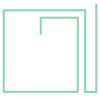

In [89]:
resonator.qgeometry_table('path')['geometry'].values[0]

In [82]:


# dic = {}
# dic['Target Frequencies'] = freqs
# dic['Buffer'] = buffers
# dic['Offset'] = offsets
# dic['Sizes'] = sizes
# # dic['CPW_lengths(mm)'] = lengths

# data = pd.DataFrame(dic)
# data

n = 4
# small[n] = True
# TQ_mir[n] = False
# sizes[n] = 193
# buffers[n] = 253
# # # Ljs[n] = '10nH'
# TQx[n] = '0.343mm'
# TQy[n] = '0.45mm'
TQ1.options.pos_x = TQx[n]
TQ1.options.pos_y = TQy[n]
TQ1.options.mirror = TQ_mir[n]
pad_size = sizes[n]*u.um
buffer = buffers[n]*u.um

Cj = jj.find_junction_capacitance(int(Ljs[n][:-2])*u.nH)
Cj1 = str(Cj.to(u.fF).value)+' fF'

# offsets[n] = 0.2
coupling_len = 20*u.um



wr = Construct_CPW(pad_size, offsets[n], clen[n], gaps[n], Ljs[n],Cj1,TQx[n], TQy[n],small[n], TQ_mir[n], buffer,)[0]
cpw_freq_predict[n] = wr.value
gui.autoscale()
print(pad_size,freqs[n],Ljs[n])
print(freqs[n])
print('The resonator frequency is', wr, freqs[n]+2.4)

06:53PM 33s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


OrderedDict([(0, array([0.2805, 0.2805])), (1, array([ 0.2805, -0.2805])), (2, array([-0.2805, -0.2805])), (3, array([-0.2805,  0.2805])), (4, array([0.3365, 0.3365])), (5, array([ 0.3365, -0.2815])), (6, array([ 0.4205, -0.2815])), (7, array([0.4205, 0.3365]))])
223.0 um 4.800000000000001 10nH
4.800000000000001
The resonator frequency is 7.212317389162276 GHz 7.200000000000001


In [68]:
buffers[n]

252

In [73]:
clens = []
for i in range(10):
    clens += ['{}um'.format(clen[i])]

In [74]:
clen

[47, 40, 24, 47, 30, 27, 25, 23, 25, 30]

In [59]:
offsets[n] = 0.064

In [344]:
TQx[n] = '-0.232mm'
TQy[n] = '0.5mm'
sizes[n] = 187

In [ ]:
small = list(data[index[9]].values)
TQ_mir = list((data[index[10]].values))
cpw_freq_predict = list(data[index[11]].values)
clen = list(data[index[12]].values)
gaps = list(data[index[13]].values)

In [77]:
d = {}
d['Target_qb_Freq(GHz)'] = freqs
d['Sizes (um)'] = sizes
d['Ljs'] = Ljs
d['Ljs (nH)'] = [int(l[:-2]) for l in Ljs]
d['Buffers (um)'] = buffers
d['Offsets (mm)'] = offsets
d['TQx'] = TQx
d['TQy'] = TQy
d['Small'] = small
d['TQ_mir'] = TQ_mir
d['CPW_freq_predict(GHz)'] = cpw_freq_predict
d['Coupling_len(um)'] = clen
d['Coupling_len'] = clens
d['Coupling_gap(um)'] = gaps
d['Coupling_gap_feedline(um)'] = datt.values[0][1:]


In [78]:
data = pd.DataFrame(d)

In [79]:
data

,Target_qb_Freq(GHz),Sizes (um),Ljs,Ljs (nH),Buffers (um),Offsets (mm),TQx,TQy,Small,TQ_mir,CPW_freq_predict(GHz),Coupling_len(um),Coupling_len,Coupling_gap(um),Coupling_gap_feedline(um)
0,4.0,250,13nH,13,212,0.000,-0.267mm,0.45mm,False,True,6.401282,47,47um,15,1.25
1,4.2,235,13nH,13,200,0.000,-0.2535mm,0.44mm,False,True,6.689526,40,40um,15,1.54
2,4.4,208,13nH,13,217,0.000,-0.2485mm,0.43mm,False,True,6.796263,24,24um,15,1.86
3,4.6,245,10nH,10,250,0.050,0.3675mm,0.5mm,True,False,6.993693,47,47um,15,2.19
4,4.8,223,10nH,10,258,0.055,0.3605mm,0.458mm,True,False,7.212317,30,30um,15,2.54
5,5.0,214,10nH,10,243,0.055,0.3485mm,0.45mm,True,False,7.495441,27,27um,15,2.88
6,5.2,235,8nH,8,210,0.042,0.3425mm,0.46mm,True,False,7.593559,25,25um,15,3.25
7,5.4,225,8nH,8,210,0.065,0.3375mm,0.46mm,True,False,7.799704,23,23um,15,3.61
8,5.6,206,8nH,8,212,0.055,0.329mm,0.44mm,True,False,8.006815,25,25um,20,3.99
9,5.8,193,8nH,8,253,0.200,0.343mm,0.45mm,True,False,8.204176,30,30um,20,4.36


In [80]:
data.to_csv('educated_guess_all_new.csv')

In [76]:
datt = pd.read_csv('/Users/wendy/Desktop/Wendy-qiskit-code/data/gaps_um.csv')

In [105]:
datt.values[0][1:]

array([1.25, 1.54, 1.86, 2.19, 2.54, 2.88, 3.25, 3.61, 3.99, 4.36])

In [311]:
cpw_freq_predict

[6.407372605569507, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [275]:
0.3965-0.06

0.3365

In [230]:
offsets

[0, 0, 0, 0, 0, 0, 0.042, 0, 0, 0]

In [255]:
data = pd.DataFrame()

In [256]:
d = {}

In [ ]:
d['Sizes (um)'] = sizes

In [128]:
print(buffer)
print(sizes)
print(TQx)

168.0 um
[250, 235, 208, 245, 223, 210, 165, 150, 138, 131]
['-0.1mm', '-0.1mm', '-0.1mm', '-0.242mm', '-0.2315mm', '-0.225mm', '-0.1mm', '-0.1mm', '-0.1mm', '-0.1mm']


In [94]:
dimless_length = []
for i in range(10):
    dimless_length += [lengths[i].value]
    print(dimless_length)

[4.753162787842315]
[4.753162787842315, 4.613162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316, 4.1151627878423165]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316, 4.1151627878423165, 4.007162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316, 4.1151627878423165, 4.007162787842316, 3.903162787842316]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316, 4.1151627878423165, 4.007162787842316, 3.903162787842316, 3.8031627878423158]
[4.753162787842315, 4.613162787842316, 4.477162787842316, 4.355162787842316, 4.225162787842316, 4.1151627878423165, 4.0071627878423

In [95]:
dimless_length

[4.753162787842315,
 4.613162787842316,
 4.477162787842316,
 4.355162787842316,
 4.225162787842316,
 4.1151627878423165,
 4.007162787842316,
 3.903162787842316,
 3.8031627878423158,
 3.717162787842317]

In [90]:
lengths[n]

<Quantity 3.71716279 mm>

In [78]:
lengths = []

In [79]:
for n in range(10):
    pad_size = sizes[n]*u.um
    buffer = buffers[n]*u.um
    offset = offsets[n]
    coupling_len = 20*u.um

    wr,length = find_cpw_freq(pad_size, offset, coupling_len, buffer)
    lengths += [length]
    print('The resonator frequency is', wr, freqs[n]+2.4)


  return lib.buffer(

  return lib.buffer(

07:11PM 07s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.
  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 07s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 6.407273000416871 GHz 6.4


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 08s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 6.601720554364541 GHz 6.6


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 08s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 6.8022569292829695 GHz 6.800000000000001


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 08s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 6.992806717155231 GHz 7.0


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 09s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 7.207961710909783 GHz 7.200000000000001


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 09s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 7.400633502787012 GHz 7.4


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 09s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 7.60009343506777 GHz 7.600000000000001


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 10s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 7.802598367659626 GHz 7.800000000000001


  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

  return lib.buffer(

07:11PM 10s INFO [delete_component]: Called delete_component cpw_1, but such a component is not in the design cache dictionary of components.


The resonator frequency is 8.007759145752072 GHz 8.000000000000002


  return lib.buffer(

  return lib.buffer(



The resonator frequency is 8.193026061903035 GHz 8.200000000000001


In [80]:
length

<Quantity 3.71716279 mm>

In [305]:
for i in range(1,10):
    print(i)

1
2
3
4
5
6
7
8
9


In [303]:
pd.read_csv('Educated_guess0325.csv')

,Unnamed: 0,Target Frequencies,Buffer,Offset,Sizes
0,0,4.0,202,0.4,250
1,1,4.2,204,0.4,230
2,2,4.4,208,0.4,210
3,3,4.6,206,0.4,196
4,4,4.8,206,0.4,184
5,5,5.0,202,0.4,170
6,6,5.2,203,0.4,155
7,7,5.4,205,0.4,140
8,8,5.6,200,0.4,132
9,9,5.8,190,0.4,125


In [302]:
pd.read_csv('Educated_guess0327.csv')

,Unnamed: 0,Target Frequencies,Buffer,Offset,Sizes
0,0,4.0,202,0.400,250
1,1,4.2,200,0.400,235
2,2,4.4,203,0.420,220
3,3,4.6,206,0.410,200
4,4,4.8,207,0.410,182
5,5,5.0,205,0.420,172
6,6,5.2,206,0.450,165
7,7,5.4,208,0.450,150
8,8,5.6,210,0.457,138
9,9,5.8,210,0.476,131


In [111]:

data.to_csv('Educated_Guess0327_2.csv')

In [115]:
result = pd.read_csv('/Users/wendy/Desktop/Wendy-qiskit-code/data/CPW_QB_freq_only_0325_2.csv')

In [116]:
result[['pad_size(mm)','buffer(um)','target_freq(GHz)','Freq_EPR1(MHz)']]

,pad_size(mm),buffer(um),target_freq(GHz),Freq_EPR1(MHz)
0,0.250,202.0,4.0,4052.461326
1,0.230,204.0,4.2,4246.707225
2,0.210,208.0,4.4,4475.325304
3,0.196,206.0,4.6,4649.307436
4,0.184,206.0,4.8,4815.997915
5,0.170,202.0,5.0,5042.427256
6,0.155,203.0,5.2,5305.466667
7,0.140,205.0,5.4,5613.889100
8,0.132,200.0,5.6,5796.487743
9,0.125,190.0,5.8,5971.615783


In [136]:
#compare qubit frequency w.r.t. the target frequency
sns.relplot(data = result,x = 'target_freq(GHz)', y = 'Freq_EPR1(MHz)',hue = 'Chi2_1(MHz)')
result['Freq_EPR1(MHz)'].values/1000 - result['target_freq(GHz)'].values

array([0.05246133, 0.04670722, 0.0753253 , 0.04930744, 0.01599792,
       0.04242726, 0.10546667, 0.2138891 , 0.19648774, 0.17161578])

In [162]:
#compare resonator frequency w.r.t. the target frequency
sns.relplot(data = result,x = 'target_res_freq(GHz)', y = 'Freq_EPR2(MHz)',hue = 'Chi2_1(MHz)')
result['Freq_EPR2(MHz)'].values/1000 - result['target_res_freq(GHz)'].values

array([-0.04874854, -0.03000159, -0.03977072, -0.04221077, -0.08378603,
       -0.03670722, -0.03422481, -0.03195547, -0.0187805 ,  0.08313761])

In [114]:
result

NameError: name 'result' is not defined

In [122]:
cpw_Freq = result['Freq_EPR2(MHz)'].values
cpw_target = result['target_freq(GHz)'].values+2.4
cpw_target*=1000

In [135]:
plt.scatter(cpw_target,cpw_Freq, label = 'Data')
plt.plot(np.arange(6000,8500,100),np.arange(6000,8500,100),color = 'black', ls = '--',alpha = 0.5,zorder = -1,label = 'x = y')
plt.xlabel('Target Frequency (MHz)')
plt.ylabel('CPW Frequency from EPR (MHz)')
plt.legend()
plt.show()


2023-03-27 22:26:38.249 python[38283:2301275] +[CATransaction synchronize] called within transaction
2023-03-27 22:26:40.267 python[38283:2301275] +[CATransaction synchronize] called within transaction
2023-03-27 22:26:41.509 python[38283:2301275] +[CATransaction synchronize] called within transaction
2023-03-27 22:26:41.771 python[38283:2301275] +[CATransaction synchronize] called within transaction
